In [152]:
import pandas as pd
import numpy as np


In [153]:

try:
    matches_df_2024 = pd.read_csv('atp_matches_2024.csv')
    matches_df_2023 = pd.read_csv('atp_matches_2023.csv')
    matches_df_2022 = pd.read_csv('atp_matches_2022.csv')
    matches_df_2021 = pd.read_csv('atp_matches_2021.csv')
    matches_df_2020 = pd.read_csv('atp_matches_2020.csv')
    matches_df_2019 = pd.read_csv('atp_matches_2019.csv')
    matches_df_2018 = pd.read_csv('atp_matches_2018.csv')
    matches_df_2017 = pd.read_csv('atp_matches_2017.csv')
    matches_df_2016 = pd.read_csv('atp_matches_2016.csv')
    matches_df_2015 = pd.read_csv('atp_matches_2015.csv')
    print("Archivos CSV cargados correctamente.")
except FileNotFoundError:
    print("Uno o más archivos CSV no fueron encontrados. Asegúrate de que los nombres de los archivos sean correctos y estén en el directorio actual.")
    exit()

# Concatenar los DataFrames verticalmente (añadiendo filas de uno debajo del otro)
all_matches_df = pd.concat([matches_df_2024, matches_df_2023, matches_df_2022, matches_df_2021, matches_df_2020, matches_df_2019, matches_df_2018, matches_df_2017, matches_df_2016, matches_df_2015], ignore_index=True)

# Mostrar las primeras filas del DataFrame concatenado
#print("\nPrimeras filas del DataFrame concatenado (all_matches_df):")
#print(all_matches_df.head())

# Mostrar información del DataFrame concatenado
print("\nInformación del DataFrame concatenado (all_matches_df):")
print(all_matches_df.info())

Archivos CSV cargados correctamente.

Información del DataFrame concatenado (all_matches_df):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27672 entries, 0 to 27671
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          27672 non-null  object 
 1   tourney_name        27672 non-null  object 
 2   surface             27619 non-null  object 
 3   draw_size           27672 non-null  int64  
 4   tourney_level       27672 non-null  object 
 5   tourney_date        27672 non-null  int64  
 6   match_num           27672 non-null  int64  
 7   winner_id           27672 non-null  int64  
 8   winner_seed         11719 non-null  float64
 9   winner_entry        3949 non-null   object 
 10  winner_name         27672 non-null  object 
 11  winner_hand         27672 non-null  object 
 12  winner_ht           27495 non-null  float64
 13  winner_ioc          27672 non-null  object 
 14  winner_a

In [154]:
import pandas as pd

# la columna de fecha se llama 'matches_df'

# Convertir la columna 'tourney_date' a tipo string (si no lo es ya)
all_matches_df['tourney_date'] = all_matches_df['tourney_date'].astype(str)

# Convertir la columna de string a formato datetime
all_matches_df['tourney_date'] = pd.to_datetime(all_matches_df['tourney_date'], format='%Y%m%d')

# Ahora la columna 'ranking_date' contendrá objetos datetime
print(all_matches_df)

matches_df = all_matches_df

      tourney_id                tourney_name surface  draw_size tourney_level  \
0      2024-0339                    Brisbane    Hard         32             A   
1      2024-0339                    Brisbane    Hard         32             A   
2      2024-0339                    Brisbane    Hard         32             A   
3      2024-0339                    Brisbane    Hard         32             A   
4      2024-0339                    Brisbane    Hard         32             A   
...          ...                         ...     ...        ...           ...   
27667   2015-605                 Tour Finals    Hard          8             F   
27668   2015-605                 Tour Finals    Hard          8             F   
27669  2015-D015  Davis Cup WG F: BEL vs GBR    Clay          4             D   
27670  2015-D015  Davis Cup WG F: BEL vs GBR    Clay          4             D   
27671  2015-D015  Davis Cup WG F: BEL vs GBR    Clay          4             D   

      tourney_date  match_n

In [155]:
import pandas as pd

# ... (tu código para cargar matches_df) ...

# Definir un umbral para el número mínimo de valores no nulos que queremos mantener
umbral_no_nulos = 13000  # Ejemplo: mantener columnas con al menos 13000 valores no nulos

# Calcular el número de valores no nulos por columna
non_null_counts = matches_df.isnull().sum()

# Identificar las columnas que tienen menos del umbral de valores no nulos
columnas_a_eliminar = non_null_counts[non_null_counts > (len(matches_df) - umbral_no_nulos)].index.tolist()

# Eliminar las columnas identificadas del DataFrame
matches_df_filtrado = matches_df.drop(columns=columnas_a_eliminar)

print(f"Número de columnas originales: {matches_df.shape[1]}")
print(f"Columnas eliminadas: {columnas_a_eliminar}")
print(f"Número de columnas después del filtrado: {matches_df_filtrado.shape[1]}")

# Mostrar la información del DataFrame filtrado para ver las columnas restantes
print("\nInformación del DataFrame después de eliminar columnas con pocos no nulos:")
matches_df_filtrado.info()

Número de columnas originales: 49
Columnas eliminadas: ['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry']
Número de columnas después del filtrado: 45

Información del DataFrame después de eliminar columnas con pocos no nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27672 entries, 0 to 27671
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          27672 non-null  object        
 1   tourney_name        27672 non-null  object        
 2   surface             27619 non-null  object        
 3   draw_size           27672 non-null  int64         
 4   tourney_level       27672 non-null  object        
 5   tourney_date        27672 non-null  datetime64[ns]
 6   match_num           27672 non-null  int64         
 7   winner_id           27672 non-null  int64         
 8   winner_name         27672 non-null  object        
 9   winner_hand         27672 non-null

In [156]:
import pandas as pd

# ... (tu código anterior para cargar matches_df y eliminar columnas) ...

# Eliminar las filas que contengan al menos un valor nulo en las columnas restantes
matches_df_sin_nulos = matches_df_filtrado.dropna()

print(f"Número de filas antes de eliminar filas con nulos: {len(matches_df_filtrado)}")
print(f"Número de filas después de eliminar filas con nulos: {len(matches_df_sin_nulos)}")

# Mostrar la información del DataFrame resultante
print("\nInformación del DataFrame después de eliminar filas con valores nulos:")
matches_df_sin_nulos.info()

matches_df = matches_df_sin_nulos

Número de filas antes de eliminar filas con nulos: 27672
Número de filas después de eliminar filas con nulos: 24473

Información del DataFrame después de eliminar filas con valores nulos:
<class 'pandas.core.frame.DataFrame'>
Index: 24473 entries, 0 to 27668
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          24473 non-null  object        
 1   tourney_name        24473 non-null  object        
 2   surface             24473 non-null  object        
 3   draw_size           24473 non-null  int64         
 4   tourney_level       24473 non-null  object        
 5   tourney_date        24473 non-null  datetime64[ns]
 6   match_num           24473 non-null  int64         
 7   winner_id           24473 non-null  int64         
 8   winner_name         24473 non-null  object        
 9   winner_hand         24473 non-null  object        
 10  winner_ht           24473 non-n

In [157]:
matches_df = matches_df.sort_values(by='tourney_level')
print(matches_df)

      tourney_id          tourney_name surface  draw_size tourney_level  \
0      2024-0339              Brisbane    Hard         32             A   
19417  2017-0407             Rotterdam    Hard         32             A   
19416  2017-0407             Rotterdam    Hard         32             A   
19415  2017-0407             Rotterdam    Hard         32             A   
19414  2017-0407             Rotterdam    Hard         32             A   
...          ...                   ...     ...        ...           ...   
6755   2022-0404  Indian Wells Masters    Hard        128             M   
6756   2022-0404  Indian Wells Masters    Hard        128             M   
6757   2022-0404  Indian Wells Masters    Hard        128             M   
13821  2019-M006  Indian Wells Masters    Hard        128             M   
21093  2017-M024    Cincinnati Masters    Hard         64             M   

      tourney_date  match_num  winner_id         winner_name winner_hand  ...  \
0       2024-01-01

In [158]:
matches_df = matches_df[(matches_df['tourney_level'] == 'M') | (matches_df['tourney_level'] == 'G')]
print(matches_df)

      tourney_id          tourney_name surface  draw_size tourney_level  \
21251   2017-560               US Open    Hard        128             G   
21241   2017-560               US Open    Hard        128             G   
21242   2017-560               US Open    Hard        128             G   
21243   2017-560               US Open    Hard        128             G   
21248   2017-560               US Open    Hard        128             G   
...          ...                   ...     ...        ...           ...   
6755   2022-0404  Indian Wells Masters    Hard        128             M   
6756   2022-0404  Indian Wells Masters    Hard        128             M   
6757   2022-0404  Indian Wells Masters    Hard        128             M   
13821  2019-M006  Indian Wells Masters    Hard        128             M   
21093  2017-M024    Cincinnati Masters    Hard         64             M   

      tourney_date  match_num  winner_id            winner_name winner_hand  \
21251   2017-08-28  

In [159]:
matches_df = matches_df.sort_values(by='tourney_date')
print(matches_df)

      tourney_id     tourney_name surface  draw_size tourney_level  \
24892   2015-580  Australian Open    Hard        128             G   
24964   2015-580  Australian Open    Hard        128             G   
24963   2015-580  Australian Open    Hard        128             G   
24983   2015-580  Australian Open    Hard        128             G   
24881   2015-580  Australian Open    Hard        128             G   
...          ...              ...     ...        ...           ...   
2701   2024-0352    Paris Masters    Hard         56             M   
2681   2024-0352    Paris Masters    Hard         56             M   
2679   2024-0352    Paris Masters    Hard         56             M   
2697   2024-0352    Paris Masters    Hard         56             M   
2713   2024-0352    Paris Masters    Hard         56             M   

      tourney_date  match_num  winner_id         winner_name winner_hand  ...  \
24892   2015-01-19         25     103970        David Ferrer           R  ... 

In [160]:
matches_df = matches_df.reset_index(drop=True)
print(matches_df)

     tourney_id     tourney_name surface  draw_size tourney_level  \
0      2015-580  Australian Open    Hard        128             G   
1      2015-580  Australian Open    Hard        128             G   
2      2015-580  Australian Open    Hard        128             G   
3      2015-580  Australian Open    Hard        128             G   
4      2015-580  Australian Open    Hard        128             G   
...         ...              ...     ...        ...           ...   
9543  2024-0352    Paris Masters    Hard         56             M   
9544  2024-0352    Paris Masters    Hard         56             M   
9545  2024-0352    Paris Masters    Hard         56             M   
9546  2024-0352    Paris Masters    Hard         56             M   
9547  2024-0352    Paris Masters    Hard         56             M   

     tourney_date  match_num  winner_id         winner_name winner_hand  ...  \
0      2015-01-19         25     103970        David Ferrer           R  ...   
1      2015

In [161]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          9548 non-null   object        
 1   tourney_name        9548 non-null   object        
 2   surface             9548 non-null   object        
 3   draw_size           9548 non-null   int64         
 4   tourney_level       9548 non-null   object        
 5   tourney_date        9548 non-null   datetime64[ns]
 6   match_num           9548 non-null   int64         
 7   winner_id           9548 non-null   int64         
 8   winner_name         9548 non-null   object        
 9   winner_hand         9548 non-null   object        
 10  winner_ht           9548 non-null   float64       
 11  winner_ioc          9548 non-null   object        
 12  winner_age          9548 non-null   float64       
 13  loser_id            9548 non-null   int64       

In [162]:
# Identificar las columnas numéricas
columnas_numericas = matches_df.select_dtypes(include=['number']).columns

# Calcular la correlación solo para las columnas numéricas
correlaciones = matches_df[columnas_numericas].corr()
print(correlaciones)

# Opcionalmente, puedes inspeccionar los valores únicos de las columnas numéricas
# para buscar valores inesperados (esto puede generar mucha salida)
# for col in columnas_numericas:
#     print(f"Valores únicos en {col}: {matches_df[col].unique()}")

                    draw_size  match_num  winner_id  winner_ht  winner_age  \
draw_size            1.000000  -0.066440   0.054127  -0.039828   -0.012568   
match_num           -0.066440   1.000000   0.009872   0.005804   -0.002900   
winner_id            0.054127   0.009872   1.000000  -0.039694   -0.573024   
winner_ht           -0.039828   0.005804  -0.039694   1.000000   -0.075461   
winner_age          -0.012568  -0.002900  -0.573024  -0.075461    1.000000   
loser_id             0.033497   0.028810   0.249321   0.021819   -0.072242   
loser_ht            -0.060097   0.025831   0.009325   0.012948   -0.025771   
loser_age           -0.006300  -0.016948  -0.043541  -0.020395    0.016597   
best_of              0.640281  -0.081008  -0.046805  -0.038401    0.047090   
minutes              0.348710  -0.024554   0.030231  -0.060318    0.019827   
w_ace                0.185908  -0.117688  -0.064706   0.441598    0.046653   
w_df                 0.176936  -0.072010  -0.006907   0.041092  

# EFAGSSFVS

In [207]:
import pandas as pd
import numpy as np

# Asegúrate de que 'jugadores_unicos' esté definido (del paso inicial)
jugadores_ganadores = matches_df['winner_name'].unique()
jugadores_perdedores = matches_df['loser_name'].unique()
jugadores_unicos = pd.unique(np.concatenate((jugadores_ganadores, jugadores_perdedores)))

estadisticas_jugadores = {}

for jugador in jugadores_unicos:
    estadisticas_jugador = {
        'ace': [],
        'df': [],
        'svpt': [],
        '1stIn': [],
        '1stWon': [],
        '2ndWon': [],
        'bpSaved': [],
        'bpFaced': [],
        'ht': []
    }

    # Estadísticas cuando es ganador
    ganador_df = matches_df[matches_df['winner_name'] == jugador]
    estadisticas_jugador['ace'].extend(ganador_df['w_ace'].dropna().tolist())
    estadisticas_jugador['df'].extend(ganador_df['w_df'].dropna().tolist())
    estadisticas_jugador['svpt'].extend(ganador_df['w_svpt'].dropna().tolist())
    estadisticas_jugador['1stIn'].extend(ganador_df['w_1stIn'].dropna().tolist())
    estadisticas_jugador['1stWon'].extend(ganador_df['w_1stWon'].dropna().tolist())
    estadisticas_jugador['2ndWon'].extend(ganador_df['w_2ndWon'].dropna().tolist())
    estadisticas_jugador['bpSaved'].extend(ganador_df['w_bpSaved'].dropna().tolist())
    estadisticas_jugador['bpFaced'].extend(ganador_df['w_bpFaced'].dropna().tolist())
    estadisticas_jugador['ht'].extend(ganador_df['winner_ht'].dropna().tolist())

    # Estadísticas cuando es perdedor
    perdedor_df = matches_df[matches_df['loser_name'] == jugador]
    estadisticas_jugador['ace'].extend(perdedor_df['l_ace'].dropna().tolist())
    estadisticas_jugador['df'].extend(perdedor_df['l_df'].dropna().tolist())
    estadisticas_jugador['svpt'].extend(perdedor_df['l_svpt'].dropna().tolist())
    estadisticas_jugador['1stIn'].extend(perdedor_df['l_1stIn'].dropna().tolist())
    estadisticas_jugador['1stWon'].extend(perdedor_df['l_1stWon'].dropna().tolist())
    estadisticas_jugador['2ndWon'].extend(perdedor_df['l_2ndWon'].dropna().tolist())
    estadisticas_jugador['bpSaved'].extend(perdedor_df['l_bpSaved'].dropna().tolist())
    estadisticas_jugador['bpFaced'].extend(perdedor_df['l_bpFaced'].dropna().tolist())
    estadisticas_jugador['ht'].extend(perdedor_df['loser_ht'].dropna().tolist())

    # Calcular la media de las estadísticas (si hay datos disponibles)
    estadisticas_promedio = {}
    for key, values in estadisticas_jugador.items():
        if values:
            estadisticas_promedio[key] = np.nanmean(values)
        else:
            estadisticas_promedio[key] = np.nan  # Si no hay datos, dejar como NaN

    estadisticas_jugadores[jugador] = estadisticas_promedio

# Convertir el diccionario de estadísticas a un DataFrame
df_jugadores = pd.DataFrame.from_dict(estadisticas_jugadores, orient='index')

#print("Primeras filas de df_jugadores:")
#print(df_jugadores.head())


# Convertir el diccionario de estadísticas a un DataFrame
df_jugadores = pd.DataFrame.from_dict(estadisticas_jugadores, orient='index')
print("Primeras filas de df_jugadores:")
print(df_jugadores.head())
print(f"\nShape de df_jugadores antes del filtrado: {df_jugadores.shape}")

# Contar la frecuencia de aparición de cada jugador
frecuencia_ganadores = matches_df['winner_name'].value_counts()
frecuencia_perdedores = matches_df['loser_name'].value_counts()
frecuencia_total = frecuencia_ganadores.add(frecuencia_perdedores, fill_value=0)

# Identificar a los jugadores que han jugado 4 o más veces
jugadores_frecuentes_4_mas = frecuencia_total[frecuencia_total >= 4].index.tolist()
print(f"\nNúmero de jugadores que han jugado 4 o más veces: {len(jugadores_frecuentes_4_mas)}")

# Filtrar el DataFrame df_jugadores
df_jugadores_filtrado_4_mas = df_jugadores[df_jugadores.index.isin(jugadores_frecuentes_4_mas)]

print(f"\nShape del DataFrame de jugadores filtrado (4 o más partidos): {df_jugadores_filtrado_4_mas.shape}")
print("\nPrimeras filas del DataFrame de jugadores filtrado (4 o más partidos):")
print(df_jugadores_filtrado_4_mas.head())

df_jugadores_filtrado = df_jugadores_filtrado_4_mas

Primeras filas de df_jugadores:
                     ace        df        svpt      1stIn     1stWon  \
David Ferrer    2.853933  3.955056   85.764045  52.550562  36.606742   
Novak Djokovic  6.020460  2.606138   83.115090  53.984655  40.485934   
Roger Federer   9.225434  1.820809   84.531792  53.421965  41.815029   
Kei Nishikori   3.470899  2.687831   90.243386  55.899471  39.116402   
Lleyton Hewitt  7.800000  4.600000  105.600000  59.400000  41.800000   

                   2ndWon   bpSaved    bpFaced     ht  
David Ferrer    17.067416  4.483146   7.561798  175.0  
Novak Djokovic  16.301790  3.483376   5.273657  188.0  
Roger Federer   18.184971  2.982659   4.352601  185.0  
Kei Nishikori   18.359788  4.497354   7.328042  178.0  
Lleyton Hewitt  24.000000  6.000000  10.200000  180.0  

Shape de df_jugadores antes del filtrado: (483, 9)

Número de jugadores que han jugado 4 o más veces: 358

Shape del DataFrame de jugadores filtrado (4 o más partidos): (358, 9)

Primeras filas del 

In [208]:
df_jugadores_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, David Ferrer to Timofey Skatov
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ace      358 non-null    float64
 1   df       358 non-null    float64
 2   svpt     358 non-null    float64
 3   1stIn    358 non-null    float64
 4   1stWon   358 non-null    float64
 5   2ndWon   358 non-null    float64
 6   bpSaved  358 non-null    float64
 7   bpFaced  358 non-null    float64
 8   ht       358 non-null    float64
dtypes: float64(9)
memory usage: 28.0+ KB


In [209]:
from sklearn.preprocessing import StandardScaler

#jugador_a_excluir = 'Albano Olivetti'
#df_jugadores_sin_olivetti = df_jugadores_filtrado[df_jugadores_filtrado.index != jugador_a_excluir].copy()

#print(f"Número de jugadores antes de excluir a Olivetti: {len(df_jugadores_filtrado)}")
#print(f"Número de jugadores después de excluir a Olivetti: {len(df_jugadores_sin_olivetti)}")

# Manejar valores faltantes (imputación con la media)
#df_jugadores_imputado_sin_olivetti = df_jugadores_sin_olivetti.fillna(df_jugadores_sin_olivetti.mean())

# Seleccionar las columnas numéricas para escalar
columnas_escalar = df_jugadores_filtrado.columns

# Inicializar el StandardScaler
scaler = StandardScaler()

# Escalar los datos
df_jugadores_escalado = scaler.fit_transform(df_jugadores_filtrado[columnas_escalar])

# Convertir el array escalado de nuevo a un DataFrame
df_jugadores_escalado = pd.DataFrame(df_jugadores_escalado, index=df_jugadores_filtrado.index, columns=columnas_escalar)

df_jugadores_escalado_df = df_jugadores_escalado

print(df_jugadores_escalado_df.head())


                     ace        df      svpt     1stIn    1stWon    2ndWon  \
David Ferrer   -1.123173  0.214346 -0.879298 -0.760356 -0.745592 -0.411826   
Novak Djokovic -0.201031 -0.816005 -1.114572 -0.583225 -0.068910 -0.682922   
Roger Federer   0.732307 -1.415866 -0.988744 -0.652725  0.162936 -0.016116   
Kei Nishikori  -0.943503 -0.753605 -0.481452 -0.346717 -0.307809  0.045784   
Lleyton Hewitt  0.317199  0.706976  0.882489  0.085650  0.160315  2.042899   

                 bpSaved   bpFaced        ht  
David Ferrer   -0.625912 -0.644392 -1.698796  
Novak Djokovic -1.510538 -1.870511  0.262066  
Roger Federer  -1.953586 -2.364066 -0.190440  
Kei Nishikori  -0.613340 -0.769652 -1.246289  
Lleyton Hewitt  0.716243  0.769310 -0.944618  


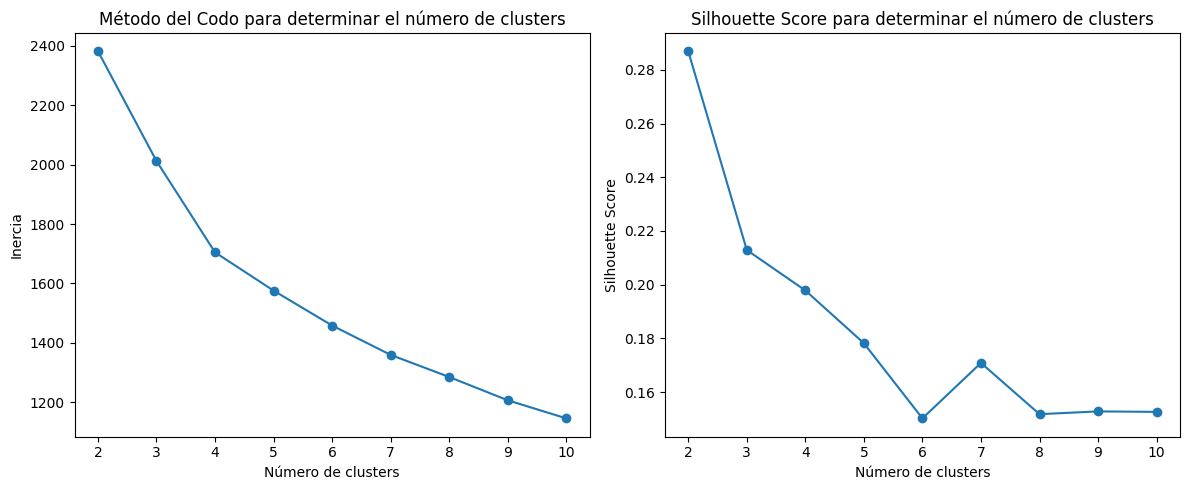


Primeras filas del DataFrame sin Olivetti y con los nuevos clusters:
                     ace        df        svpt     ht  cluster
David Ferrer    2.853933  3.955056   85.764045  175.0        3
Novak Djokovic  6.020460  2.606138   83.115090  188.0        3
Roger Federer   9.225434  1.820809   84.531792  185.0        3
Kei Nishikori   3.470899  2.687831   90.243386  178.0        3
Lleyton Hewitt  7.800000  4.600000  105.600000  180.0        0

Conteo de jugadores por nuevo cluster:
cluster
0    125
1     72
2     25
3    136
Name: count, dtype: int64


C:\Users\Arnau Climent\AppData\Local\Temp\ipykernel_17108\1253000455.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jugadores_filtrado['cluster'] = clusters


In [210]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Determinar el número óptimo de clusters (método del codo y silhouette score)
inertia = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_jugadores_escalado_df)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(df_jugadores_escalado_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Método del codo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo para determinar el número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score para determinar el número de clusters')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

# Aplicar K-Means con el número de clusters anterior (ejemplo: n_clusters=5)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_jugadores_escalado)

# Añadir la etiqueta del cluster al DataFrame sin Olivetti
df_jugadores_filtrado['cluster'] = clusters

print("\nPrimeras filas del DataFrame sin Olivetti y con los nuevos clusters:")
print(df_jugadores_filtrado[['ace', 'df', 'svpt', 'ht', 'cluster']].head())

print("\nConteo de jugadores por nuevo cluster:")
print(df_jugadores_filtrado['cluster'].value_counts().sort_index())

df_jugadores = df_jugadores_filtrado


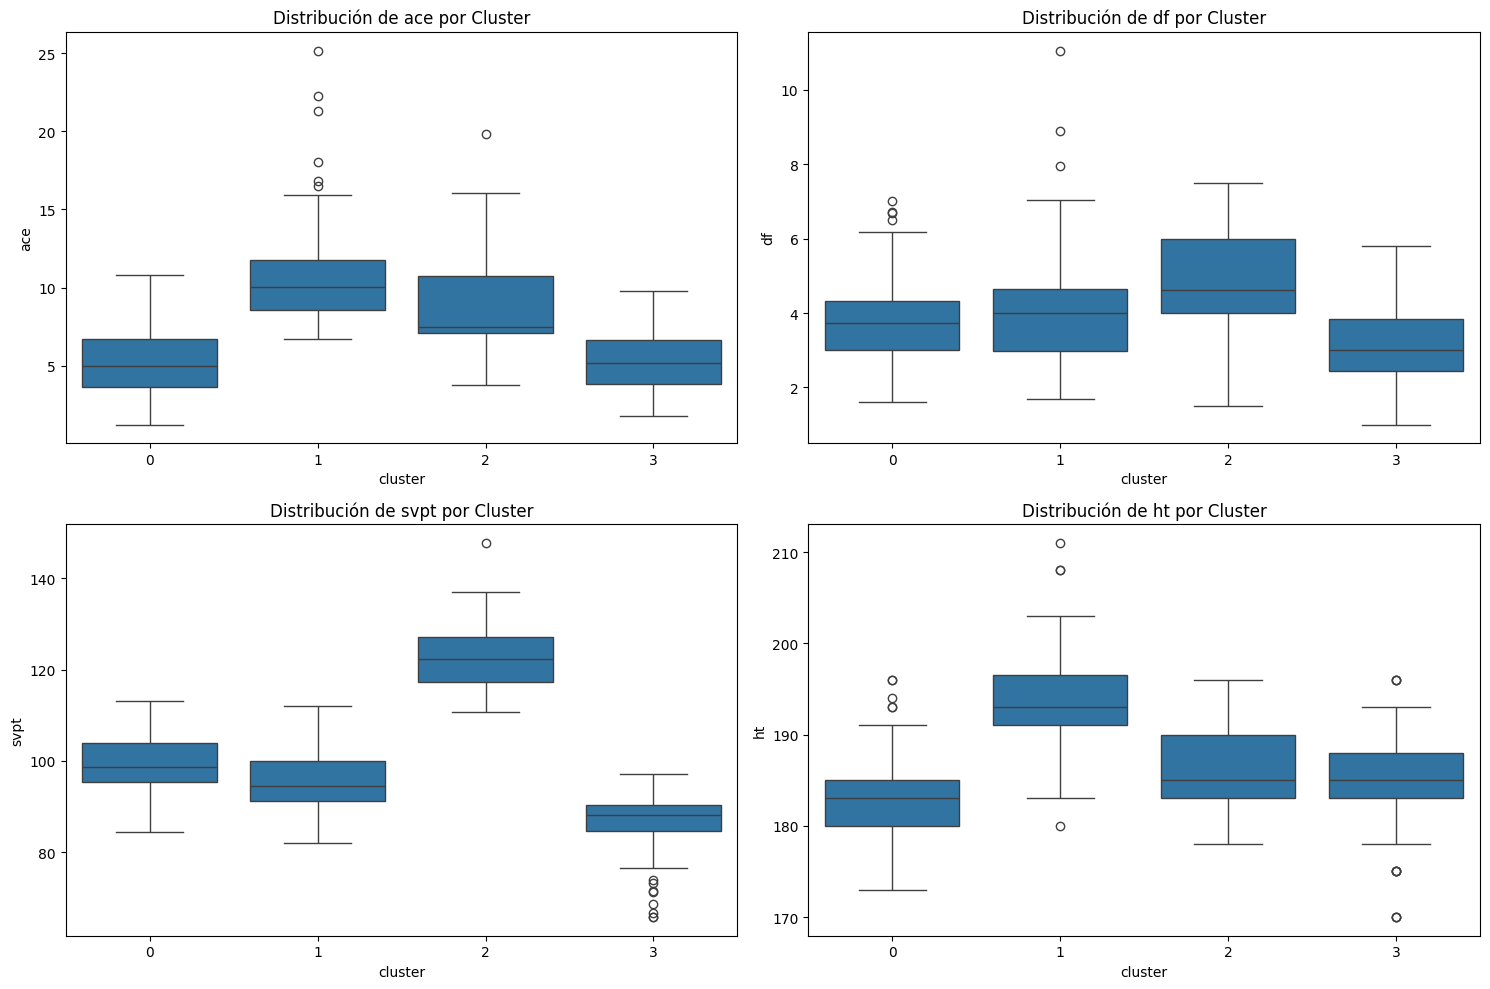

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

columnas_para_visualizar = ['ace', 'df', 'svpt', 'ht']
cluster_columna = 'cluster'  # Asegúrate de usar el nombre correcto de tu columna de cluster

plt.figure(figsize=(15, 10))
for i, columna in enumerate(columnas_para_visualizar):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=cluster_columna, y=columna, data=df_jugadores)
    plt.title(f'Distribución de {columna} por Cluster')
plt.tight_layout()
plt.show()

In [212]:

# Analizar las características promedio
print("\nCaracterísticas promedio por cluster:")
print(df_jugadores.groupby('cluster').mean())


Características promedio por cluster:
               ace        df        svpt      1stIn     1stWon     2ndWon  \
cluster                                                                     
0         5.272346  3.780323   99.488498  61.281397  41.225728  18.434230   
1        11.023016  4.086253   95.607233  58.933930  43.913544  18.390496   
2         8.954427  4.834671  123.687980  76.527541  53.035197  23.550274   
3         5.337480  3.145820   87.027576  52.943691  36.724381  16.980606   

          bpSaved    bpFaced          ht  
cluster                                   
0        5.923763  10.103183  182.984000  
1        4.465432   7.190164  194.166667  
2        7.038878  11.457494  185.880000  
3        4.560705   7.872108  185.161765  


In [213]:
df_jugadores.head(50)

,ace,df,svpt,1stIn,1stWon,2ndWon,bpSaved,bpFaced,ht,cluster
David Ferrer,2.853933,3.955056,85.764045,52.550562,36.606742,17.067416,4.483146,7.561798,175.0,3
Novak Djokovic,6.020460,2.606138,83.115090,53.984655,40.485934,16.301790,3.483376,5.273657,188.0,3
Roger Federer,9.225434,1.820809,84.531792,53.421965,41.815029,18.184971,2.982659,4.352601,185.0,3
Kei Nishikori,3.470899,2.687831,90.243386,55.899471,39.116402,18.359788,4.497354,7.328042,178.0,3
Lleyton Hewitt,7.800000,4.600000,105.600000,59.400000,41.800000,24.000000,6.000000,10.200000,180.0,0
Benjamin Becker,8.000000,3.437500,98.437500,61.375000,41.687500,17.250000,4.750000,9.000000,178.0,0
Gael Monfils,8.278607,4.303483,87.840796,54.736318,39.860697,16.482587,4.258706,6.885572,193.0,1
Gilles Muller,16.851852,5.092593,102.685185,61.222222,48.777778,20.240741,4.833333,7.259259,193.0,1
Jerzy Janowicz,9.578947,5.789474,102.631579,64.789474,46.473684,17.842105,5.684211,9.105263,203.0,1
Feliciano Lopez,12.980769,3.913462,95.038462,54.932692,41.384615,19.625000,4.855769,7.701923,188.0,1


In [214]:
df_jugadores_ordenado_por_cluster = df_jugadores.sort_values(by='cluster')
print("DataFrame df_jugadores ordenado por cluster:")
print(df_jugadores_ordenado_por_cluster.head(10)) # Muestra las primeras filas ordenadas

DataFrame df_jugadores ordenado por cluster:
                         ace        df        svpt      1stIn     1stWon  \
Timofey Skatov      1.250000  4.000000  108.750000  73.250000  43.000000   
Pedro Sousa         3.200000  4.200000   91.400000  55.400000  35.800000   
Malek Jaziri        4.688889  4.400000  100.533333  52.933333  37.355556   
James Duckworth     8.877551  3.857143  107.346939  59.836735  42.816327   
Andreas Seppi       7.786667  3.333333  104.040000  60.106667  43.680000   
John Patrick Smith  5.750000  2.500000  101.250000  67.750000  41.750000   
Lleyton Hewitt      7.800000  4.600000  105.600000  59.400000  41.800000   
Benjamin Becker     8.000000  3.437500   98.437500  61.375000  41.687500   
Yu Hsiou Hsu        3.833333  2.500000   93.166667  64.000000  42.166667   
Max Purcell         9.888889  3.333333   94.037037  55.481481  40.481481   

                       2ndWon   bpSaved    bpFaced     ht  cluster  
Timofey Skatov      16.250000  6.500000  12.25000

In [215]:
nombre_jugador_buscar = 'Lukas Rosol'  # Ejemplo: Reemplaza con el nombre del jugador que buscas

if nombre_jugador_buscar in df_jugadores_ordenado_por_cluster.index:
    info_jugador = df_jugadores_ordenado_por_cluster.loc[nombre_jugador_buscar]
    print(f"\nInformación de {nombre_jugador_buscar}:")
    print(info_jugador)
else:
    print(f"\nNo se encontró al jugador '{nombre_jugador_buscar}' en el DataFrame.")


Información de Lukas Rosol:
ace          8.074074
df           4.629630
svpt       110.703704
1stIn       65.148148
1stWon      47.481481
2ndWon      22.851852
bpSaved      6.407407
bpFaced      9.666667
ht         193.000000
cluster      2.000000
Name: Lukas Rosol, dtype: float64


Cluster 0:

Posible Interpretación: Jugadores con un juego de saque equilibrado, con una cantidad moderada de aces y dobles faltas, y un volumen de saque promedio. Son los más bajos en altura promedio y enfrentan una cantidad notable de puntos de quiebre.


Cluster 1:

Posible Interpretación: Sacadores muy altos con una gran cantidad de aces, una cantidad promedio de dobles faltas y un volumen de saque promedio. No enfrentan muchos puntos de quiebre.


Cluster 2:

Posible Interpretación: Jugadores con un juego de saque de alto volumen, generando muchos aces pero también cometiendo más dobles faltas. Enfrentan y salvan una cantidad considerable de puntos de quiebre.



Cluster 3:

Posible Interpretación: Jugadores con un juego de saque más conservador, de menor volumen y con pocos errores.